# Classification Assignment4 2020AIML003

In [1]:
# Import the required libraries for data frame loading, analysis, pre-processing, visualisation & modeling etc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the input dataset present in "loan_data-1.csv" using the read_csv method of the pandas dataframe
dataset = pd.read_csv("loan_data-1.csv")

In [3]:
# lets perform some exploratory data analysis...
# inspect the first 5 rows using the head method of the dataframe object
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# inspect the last 5 rows using the tail method of the dataframe object
dataset.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [5]:
# inspect how many rows x columns are there in the input data, using the shape variable of the dataframe
dataset.shape

(9578, 14)

In [6]:
# Lets check using the info method to see nature of columns, any indication of NULL/NaN/missing values etc in any columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
dataset.isnull().sum() #finding out if data has missing values

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
# we see no missing data, NaN, NULL etc...
# lets see some statistics about the data 
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


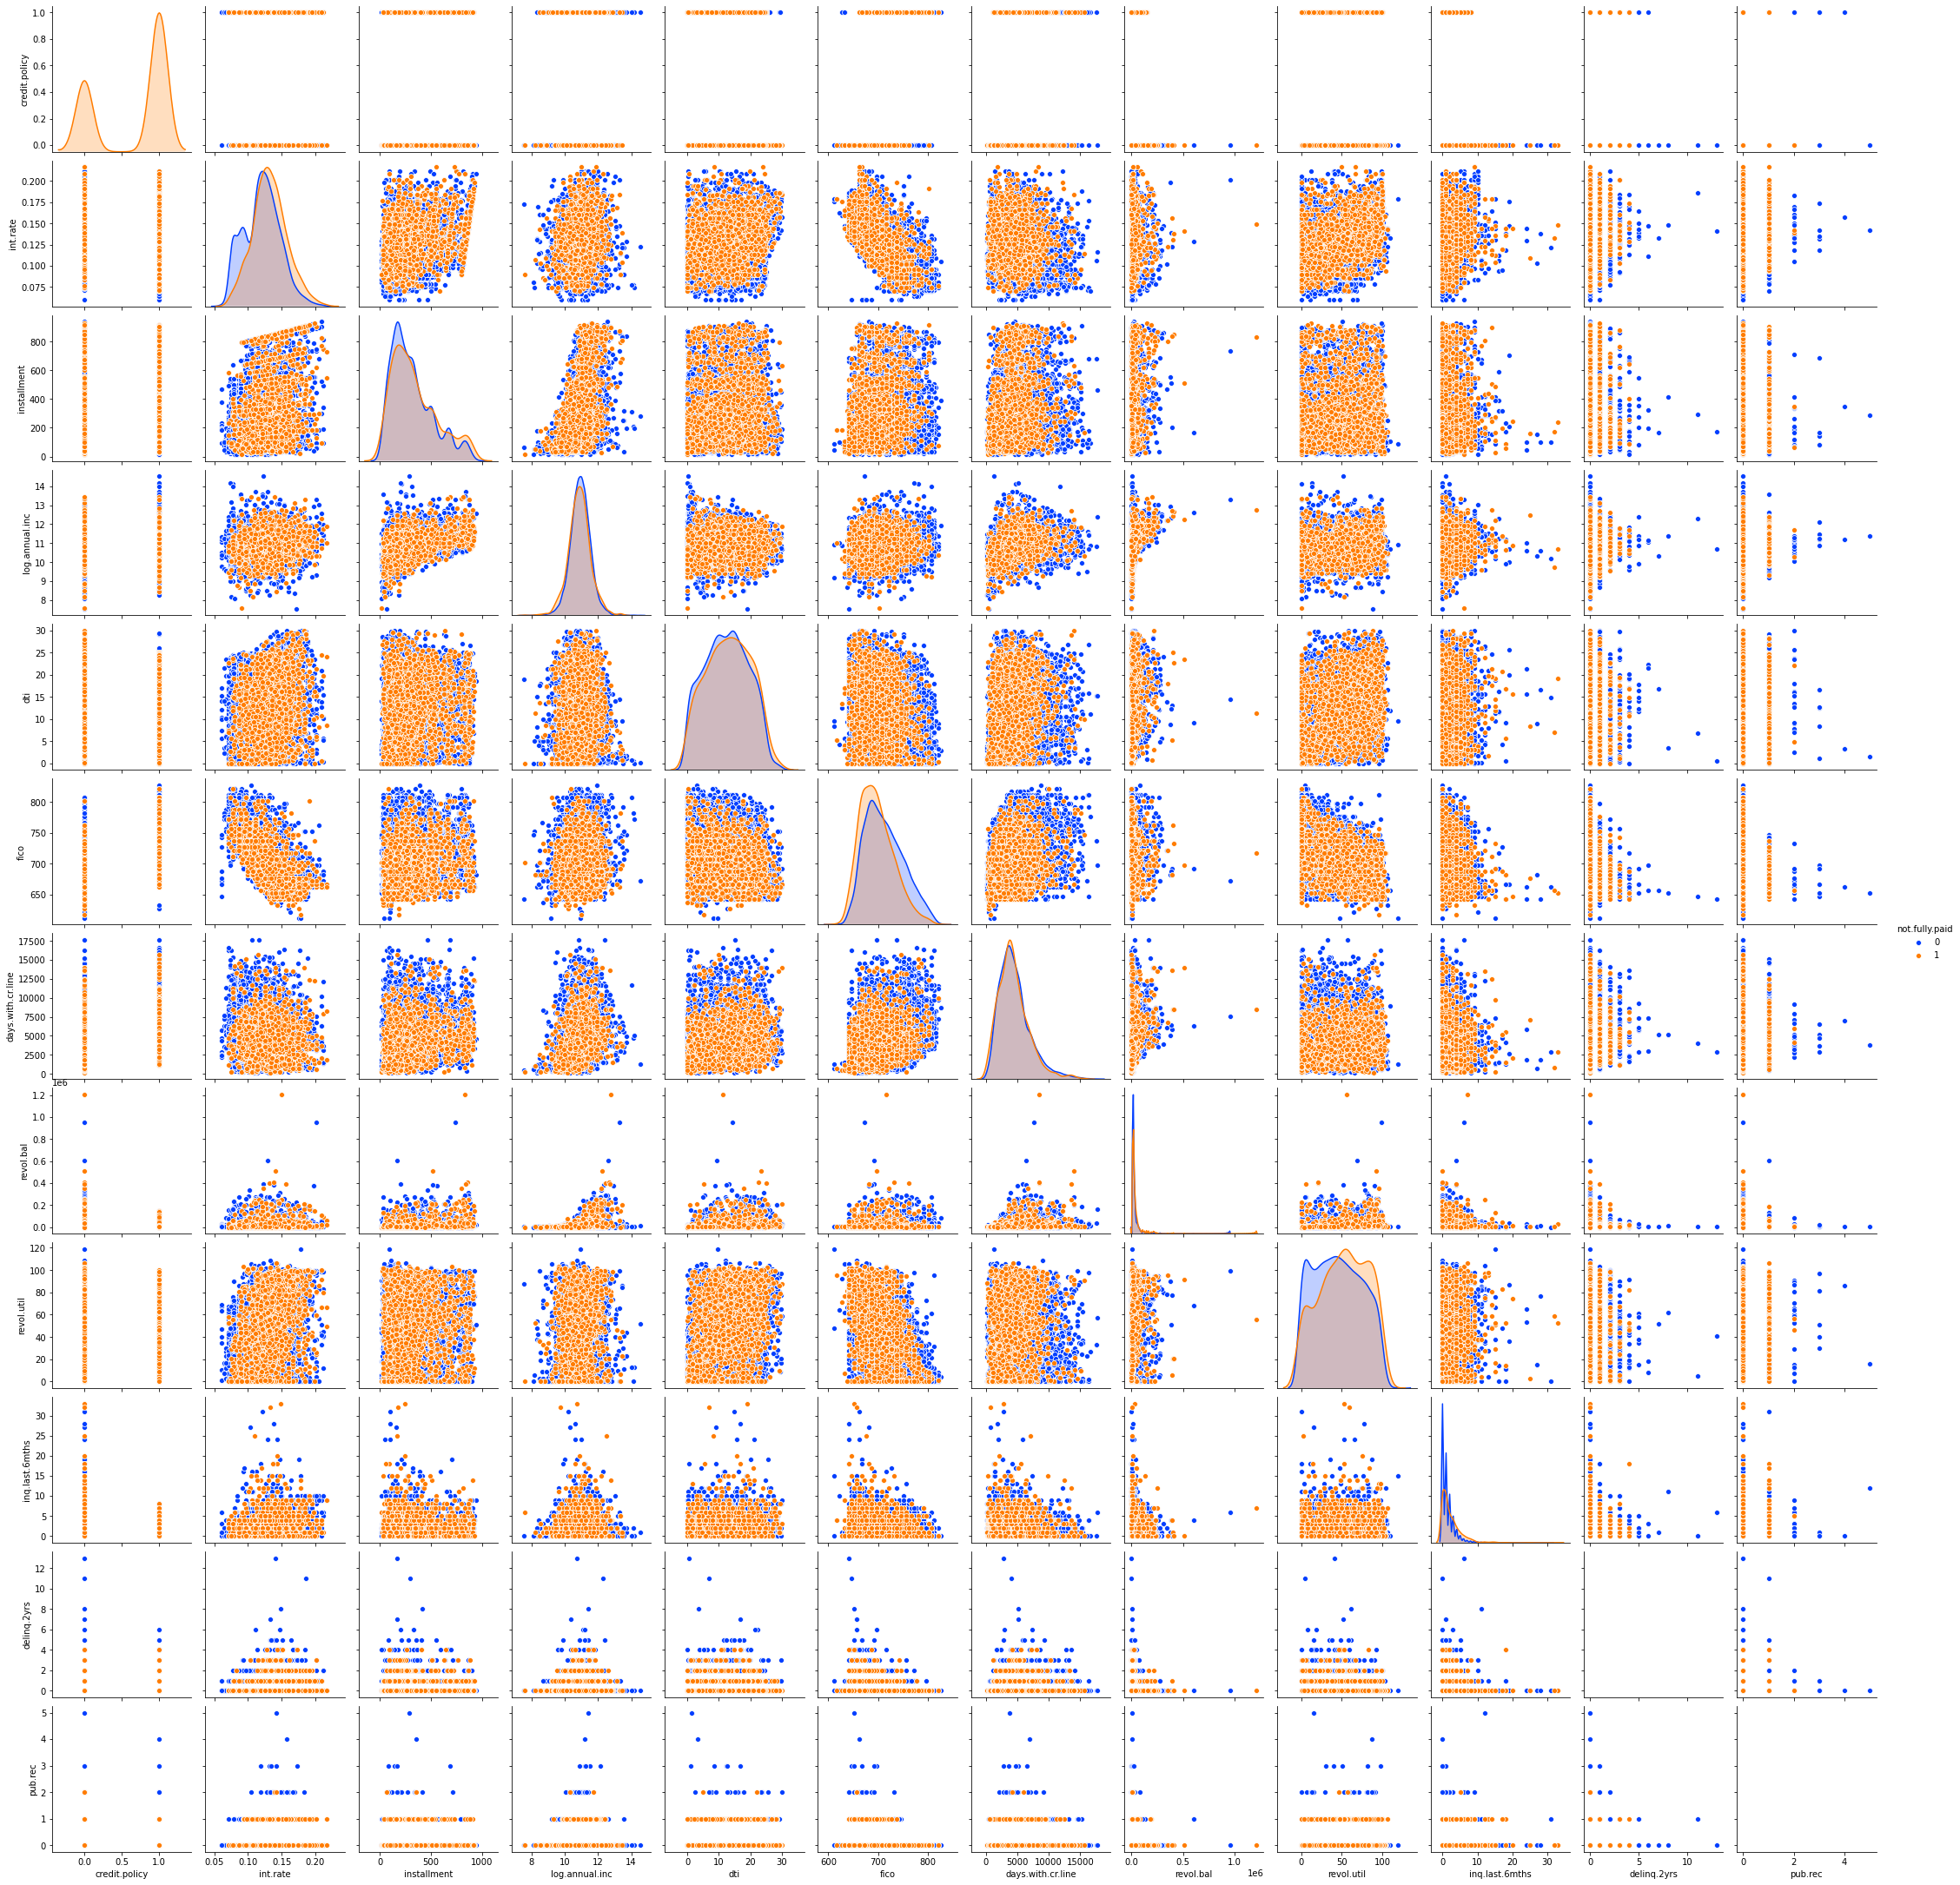

In [9]:
# lets see the pair plot of all the variables
sns.pairplot(dataset, hue="not.fully.paid", palette="bright")

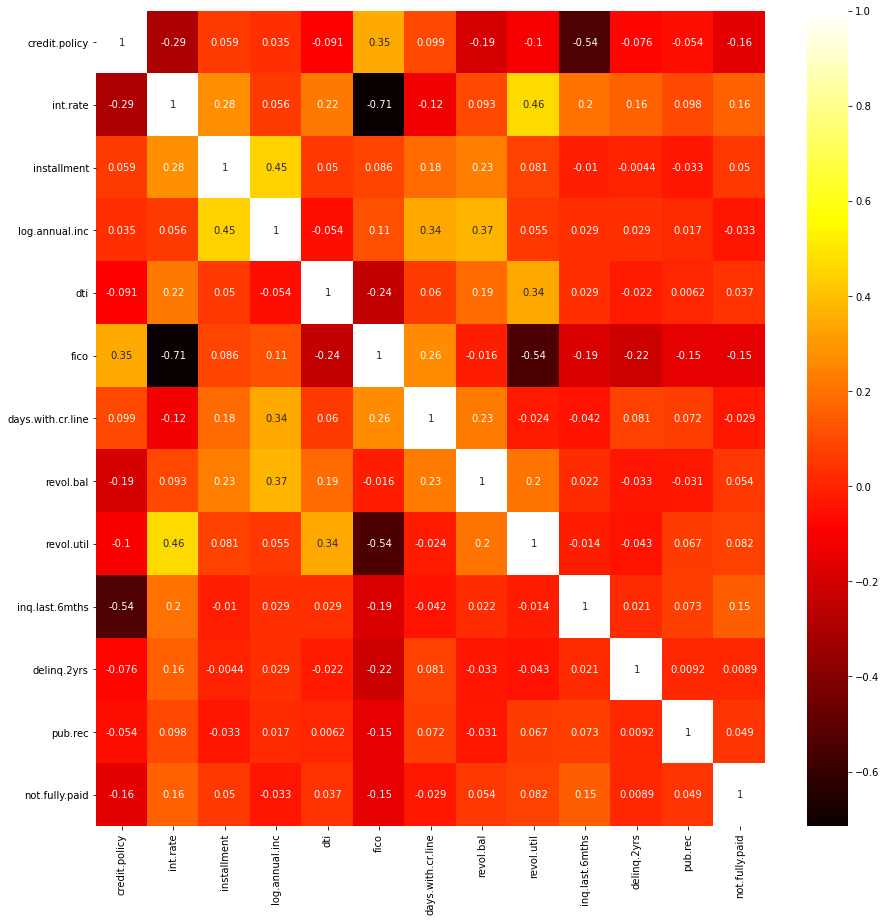

In [10]:
# Now, lets see heat map for correlation between features and outputs
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="hot", annot=True) 

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214614d8130>)

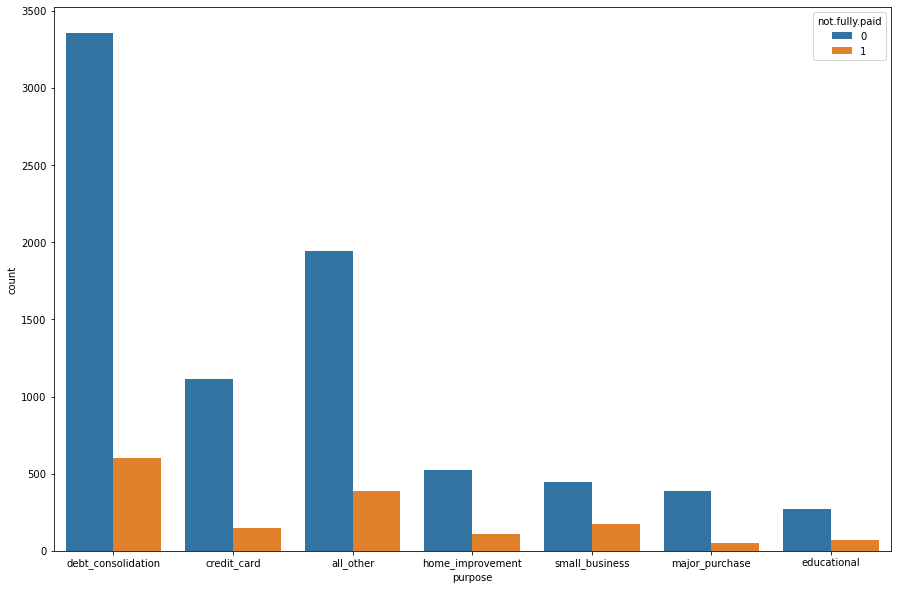

In [11]:
# lets see the count plot of all the variables
plt.subplots(figsize =(15, 10))
ax = sns.countplot(x="purpose", hue="not.fully.paid", data=dataset)

In [12]:
# as part of preparation we will encode variables of type object 
# Lets see how many distinct/unique values are in the column 'purpose'
dataset['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [13]:
# we see that 'purpose' has only 7 distinct values
# this is a good candidate for encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['purpose'] = label_encoder.fit_transform(dataset['purpose'])

In [14]:
# lets see some statistics about the data again
dataset.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [15]:
# save the data after all preprocessing is done to an output file for reference
dataset.to_csv("loan_data-1-output.csv", index=False)

MinMaxScaler()

SVC(C=0.1, kernel='linear', random_state=1)

array([[1.        , 1.        , 0.15217391, ..., 0.0625    , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.46163683, ..., 0.15625   , 0.        ,
        0.        ],
       [1.        , 1.        , 0.59910486, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.74040921, ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.75831202, ..., 0.4375    , 0.        ,
        0.        ]])

0.8400313152400835
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.00      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832

[[3219    0]
 [ 613    0]]


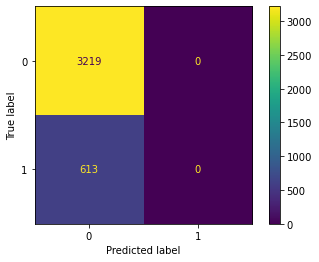

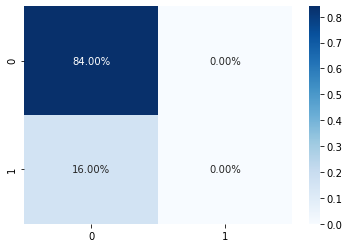

MinMaxScaler()

SVC(C=0.1, kernel='poly', random_state=1)

array([[1.        , 0.33333333, 0.42263427, ..., 0.03125   , 0.        ,
        0.        ],
       [1.        , 0.5       , 0.08951407, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.46163683, ..., 0.03125   , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.74040921, ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.75831202, ..., 0.4375    , 0.        ,
        0.        ]])

0.8400313152400835
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.00      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832

[[3219    0]
 [ 613    0]]


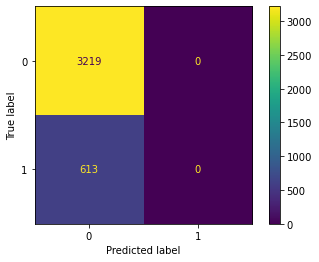

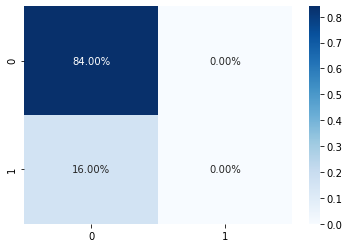

MinMaxScaler()

SVC(C=0.1, random_state=1)

array([[1.        , 0.33333333, 0.3286445 , ..., 0.03125   , 0.        ,
        0.        ],
       [1.        , 0.5       , 0.08951407, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.59910486, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.74040921, ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.75831202, ..., 0.4375    , 0.        ,
        0.        ]])

0.8400313152400835
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3219
           1       0.00      0.00      0.00       613

    accuracy                           0.84      3832
   macro avg       0.42      0.50      0.46      3832
weighted avg       0.71      0.84      0.77      3832

[[3219    0]
 [ 613    0]]


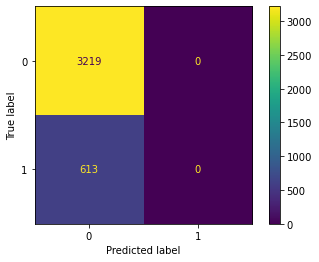

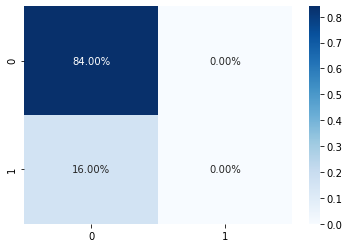

In [16]:
# As all exploratory data analysis, clean up is completed, the data is ready for modeling

# let's try SVC classification for all 3 kernel types
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    rows = dataset.shape[0]
    cols = dataset.shape[1]
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, cols-1].values
    
    # Lets split training and testing data
    # We will also stratefy the samples for consistency, to counter the input data imbalance that is present in the data given
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

    # Let's scale the data as it is a required step prior to SVM classification 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # instantiate and fit the SVM Classifier
    from sklearn.svm import SVC
    svm = SVC(kernel= kernel, random_state=1, C=0.1)
    svm.fit(X_train, y_train)
    
    # print the support vectors identified by the model
    svm.support_vectors_
    
    # predict using the model
    y_predict = svm.predict(X_test)

    # display accuracy score metric
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test, y_predict))

    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(svm, X_test, y_test)
    plt.show()

    cf_matrix = confusion_matrix(y_test, y_predict)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

In [17]:
# due to heavy imbalance of the input data (~80% belonging to "not.fully.paid=0" and ~20% belonging to "not.fully.paid=1" )
# though we get an accuracy score of 84%, we see that from the confusion matrix above, the alogrithm has not predicted
# even a single test instance correctly when actual test data contained "not.fully.paid=1"
# the alogrithm has pretty much derived most of its logic from the highly skewed / imbalanced training/input data
# we will have to use other techniques to overcome the imbalance of the data, so that the algorithm performs better

# some of the techniques used to overcome this situation are:
    # Under Sampling / Over Sampling
    # Boosting the class weights for the 'weaker' class
    # Ensemble Techniques

MinMaxScaler()

SVC(C=0.1, kernel='linear', random_state=1)

array([[1.        , 0.33333333, 0.38688525, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.28327869, ..., 0.0625    , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.46491803, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.22098361, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.21245902, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.52655738, ..., 0.03125   , 0.        ,
        0.        ]])

0.7471294363256785
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      3219
           1       0.28      0.36      0.31       613

    accuracy                           0.75      3832
   macro avg       0.57      0.59      0.58      3832
weighted avg       0.77      0.75      0.76      3832

[[2645  574]
 [ 395  218]]


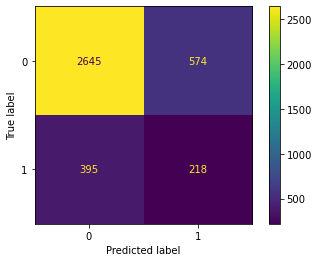

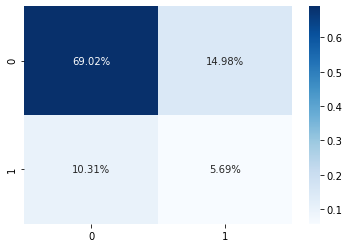

MinMaxScaler()

SVC(C=0.1, kernel='poly', random_state=1)

array([[1.        , 0.33333333, 0.38688525, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.28327869, ..., 0.0625    , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.46491803, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.22098361, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.21245902, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.52655738, ..., 0.03125   , 0.        ,
        0.        ]])

0.6701461377870563
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      3219
           1       0.25      0.51      0.33       613

    accuracy                           0.67      3832
   macro avg       0.56      0.61      0.56      3832
weighted avg       0.78      0.67      0.71      3832

[[2253  966]
 [ 298  315]]


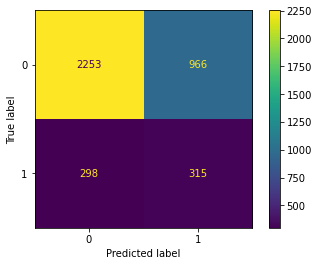

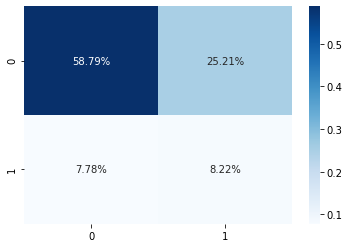

MinMaxScaler()

SVC(C=0.1, random_state=1)

array([[1.        , 0.33333333, 0.38688525, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.28327869, ..., 0.0625    , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.46491803, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.21245902, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.52655738, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.75213115, ..., 0.4375    , 0.        ,
        0.        ]])

0.6534446764091858
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      3219
           1       0.24      0.52      0.33       613

    accuracy                           0.65      3832
   macro avg       0.56      0.60      0.55      3832
weighted avg       0.78      0.65      0.70      3832

[[2183 1036]
 [ 292  321]]


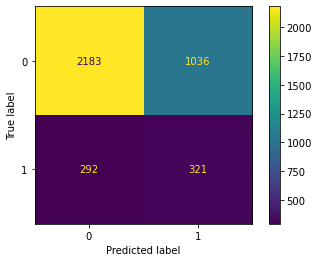

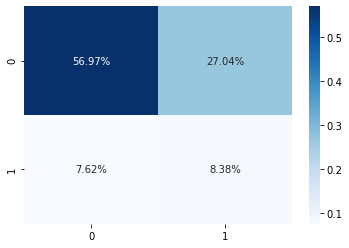

In [18]:
# lets try Random Under Sampling

# let's try SVC classification for all 3 kernel types
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    rows = dataset.shape[0]
    cols = dataset.shape[1]
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, cols-1].values
    
    # Lets split training and testing data
    # We will also stratefy the samples for consistency, to counter the input data imbalance that is present in the data given
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

    # we will use under sampling to see if that improves the situation
    from imblearn.under_sampling import RandomUnderSampler

    rus = RandomUnderSampler(random_state=0)
    X_train, y_train = rus.fit_resample(X_train, y_train)
    
    # Let's scale the data as it is a required step prior to SVM classification 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # instantiate and fit the SVM Classifier
    from sklearn.svm import SVC
    svm = SVC(kernel= kernel, random_state=1, C=0.1)
    svm.fit(X_train, y_train)
    
    # print the support vectors identified by the model
    svm.support_vectors_
    
    # predict using the model
    y_predict = svm.predict(X_test)

    # display accuracy score metric
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test, y_predict))

    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(svm, X_test, y_test)
    plt.show()

    cf_matrix = confusion_matrix(y_test, y_predict)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

MinMaxScaler()

SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=1)

array([[0.        , 0.16666667, 0.51918159, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.3286445 , ..., 0.03125   , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.23209719, ..., 0.03125   , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.24040921, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.23209719, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ]])

0.7497390396659708
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3219
           1       0.27      0.33      0.30       613

    accuracy                           0.75      3832
   macro avg       0.57      0.58      0.57      3832
weighted avg       0.77      0.75      0.76      3832

[[2671  548]
 [ 411  202]]


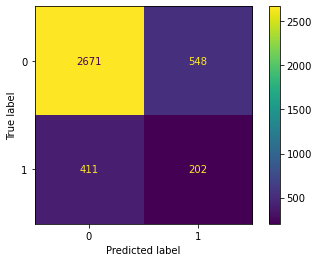

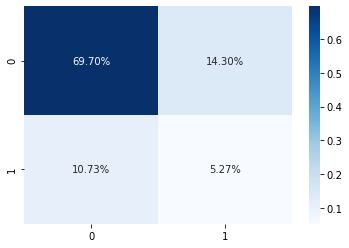

MinMaxScaler()

SVC(C=0.1, class_weight='balanced', kernel='poly', random_state=1)

array([[0.        , 0.16666667, 0.51918159, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.3286445 , ..., 0.03125   , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.23209719, ..., 0.03125   , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.23209719, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.74040921, ..., 0.125     , 0.        ,
        0.        ]])

0.6873695198329853
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      3219
           1       0.25      0.48      0.33       613

    accuracy                           0.69      3832
   macro avg       0.57      0.60      0.56      3832
weighted avg       0.78      0.69      0.72      3832

[[2340  879]
 [ 319  294]]


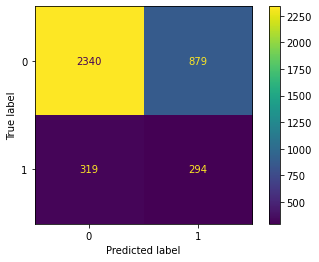

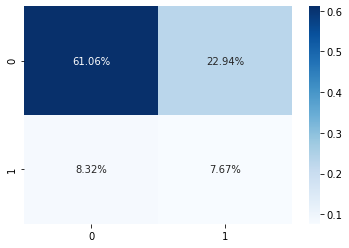

MinMaxScaler()

SVC(C=0.1, class_weight='balanced', random_state=1)

array([[0.        , 0.16666667, 0.51918159, ..., 0.09375   , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.3286445 , ..., 0.03125   , 0.        ,
        0.        ],
       [1.        , 0.        , 0.32161125, ..., 0.03125   , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.53836317, ..., 0.03125   , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.74040921, ..., 0.125     , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.75831202, ..., 0.4375    , 0.        ,
        0.        ]])

0.6842379958246346
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3219
           1       0.25      0.47      0.32       613

    accuracy                           0.68      3832
   macro avg       0.56      0.60      0.56      3832
weighted avg       0.78      0.68      0.72      3832

[[2332  887]
 [ 323  290]]


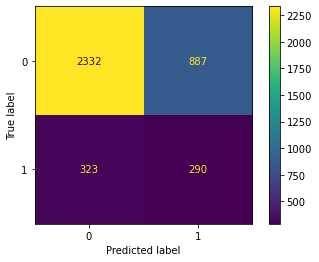

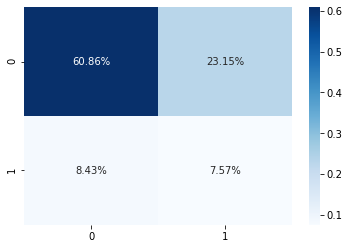

In [19]:
# Lets try boosting the class weights

# let's try SVC classification for all 3 kernel types
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    rows = dataset.shape[0]
    cols = dataset.shape[1]
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, cols-1].values
    
    # Lets split training and testing data
    # We will also stratefy the samples for consistency, to counter the input data imbalance that is present in the data given
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=43, stratify=y)

    # Let's scale the data as it is a required step prior to SVM classification 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # instantiate and fit the SVM Classifier
    from sklearn.svm import SVC
    svm = SVC(kernel=kernel, random_state=1, C=0.1, class_weight='balanced')    
    svm.fit(X_train, y_train)
    
    # print the support vectors identified by the model
    svm.support_vectors_
    
    # predict using the model
    y_predict = svm.predict(X_test)

    # display accuracy score metric
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print(accuracy_score(y_test, y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test, y_predict))

    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(svm, X_test, y_test)
    plt.show()

    cf_matrix = confusion_matrix(y_test, y_predict)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

In [20]:
# using SVM, despite having an imbalanced input data set using undersampling or class wieght boosting, we have 
# got a fair amount of accuracy, f1 score and precision metrics as well for the algorithm